In [1]:
Point = tuple[int, int]

Square = tuple[Point, Point]

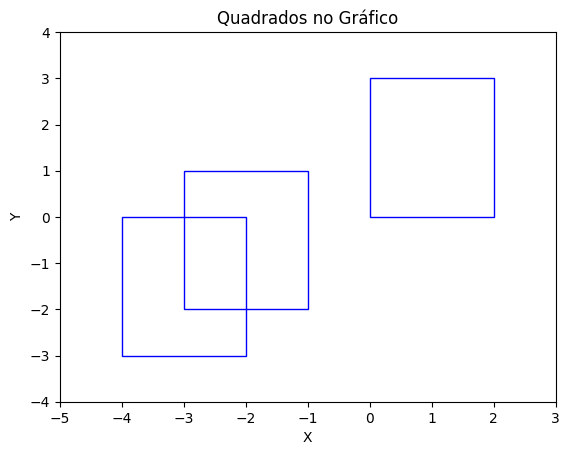

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def desenhar_quadrados(quadrados):
    """
    Desenha quadrados no gráfico com base em uma lista de pontos, ajustando automaticamente os limites para incluir valores negativos.

    Parâmetros:
    quadrados (list): Lista de tuplas ((x1, y1), (x2, y2)), onde
                      (x1, y1) é o ponto inferior esquerdo e (x2, y2) o ponto superior direito.
    """
    fig, ax = plt.subplots()

    # Itera sobre cada tupla de pontos para desenhar o quadrado
    for ponto_inf, ponto_sup in quadrados:
        x1, y1 = ponto_inf
        x2, y2 = ponto_sup

        # Calcula a largura e a altura do quadrado
        largura = x2 - x1
        altura = y2 - y1

        # Adiciona o quadrado ao gráfico
        retangulo = patches.Rectangle(
            (x1, y1), largura, altura, linewidth=1, edgecolor="blue", facecolor="none"
        )
        ax.add_patch(retangulo)

    # Encontra os limites mínimo e máximo para X e Y considerando os pontos fornecidos
    min_x = min(x1 for (x1, _), _ in quadrados)
    max_x = max(x2 for _, (x2, _) in quadrados)
    min_y = min(y1 for (_, y1), _ in quadrados)
    max_y = max(y2 for _, (_, y2) in quadrados)

    # Configura o limite do gráfico com base nos valores encontrados
    ax.set_xlim(min_x - 1, max_x + 1)
    ax.set_ylim(min_y - 1, max_y + 1)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Quadrados no Gráfico")
    plt.show()


# Exemplo de uso com valores negativos
quadrados = [((-3, -2), (-1, 1)), ((0, 0), (2, 3)), ((-4, -3), (-2, 0))]
desenhar_quadrados(quadrados)


In [3]:
def create_points(N: int, K: int, L: int) -> list:
    lista = []
    for i in range(N):
        lista.append(((i * K - L, i * K - L), (i * K + L, i * K + L)))
    return lista

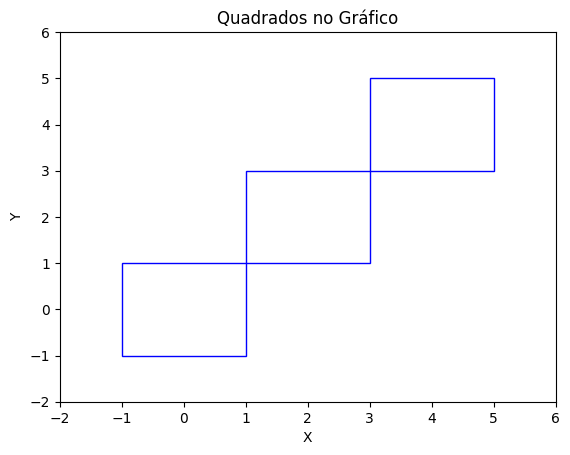

In [4]:
desenhar_quadrados(create_points(3, 2, 1))

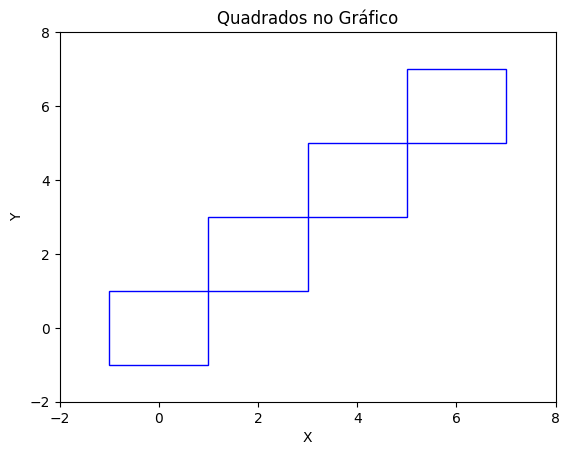

In [5]:
desenhar_quadrados(create_points(4, 2, 1))


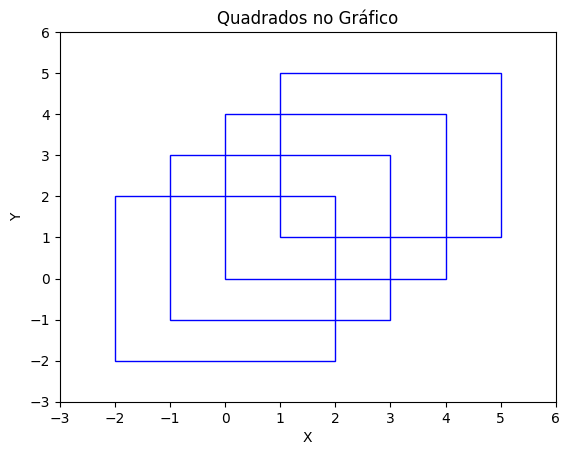

In [6]:
desenhar_quadrados(create_points(4, 1, 2))

In [11]:
def ponto_esta_no_quadrado(ponto: Point, quadrado: Square) -> bool:
    (x_min, y_min), (x_max, y_max) = quadrado
    x, y = ponto
    return x_min < x < x_max and y_min < y < y_max


quadrados_1 = create_points(4, 2, 1)
quadrados_2 = create_points(4, 1, 2)
(
    (ponto_esta_no_quadrado(quadrados_1[1][0], quadrados_1[0])),
    (ponto_esta_no_quadrado(quadrados_2[1][0], quadrados_2[0])),
)

(False, True)

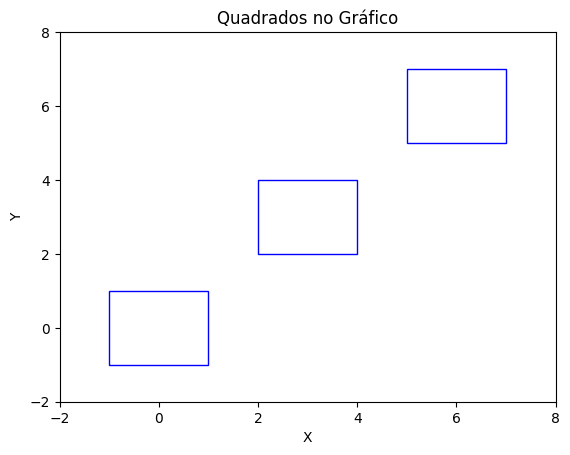

In [9]:
desenhar_quadrados(create_points(3, 3, 1))

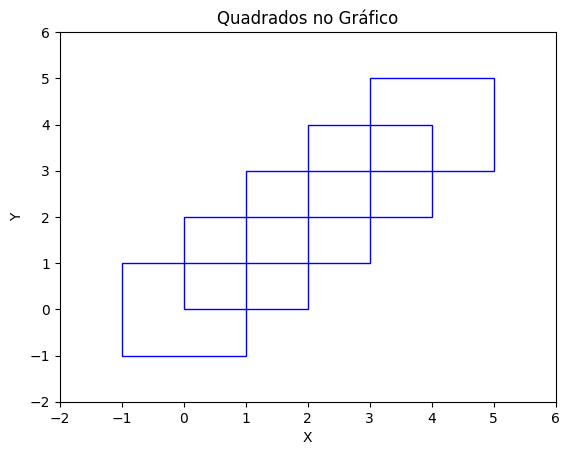

In [10]:
desenhar_quadrados(create_points(5, 1, 1))


In [17]:
len(create_points(4, 1, 1))

4

In [14]:
def calcular_area_quadrado(ponto1: Point, ponto2: Point) -> int:
    largura = ponto2[0] - ponto1[0]
    altura = ponto2[1] - ponto1[1]

    return largura * altura


def calcular_area_quadrados_livres(
    quadrados: list[Square],
) -> int:
    total = 0
    for ponto_inf, ponto_sup in quadrados:
        total = total + calcular_area_quadrado(ponto_inf, ponto_sup)
    return total


def sum_from_n_to_1(n):
    return n * (n + 1) // 2


def calcular_area_quadrados_coincidente(quadrados: Square):
    meio = calcular_area_quadrado(quadrados[0], quadrados[1])
    multiply = quadrados[0][1] - meio[1]
    return sum_from_n_to_1(n)


def obter_limites(quadrados: Square) -> Square:
    menor_x = min(x1 for (x1, _), _ in quadrados)
    maior_x = max(x2 for _, (x2, _) in quadrados)
    menor_y = min(y1 for (_, y1), _ in quadrados)
    maior_y = max(y2 for _, (_, y2) in quadrados)

    menor_ponto = (menor_x, menor_y)
    maior_ponto = (maior_x, maior_y)

    return menor_ponto, maior_ponto

In [15]:
sum_from_n_to_1(5), sum_from_n_to_1(4)

(15, 10)

In [15]:
def apply_formula(N: int, K: int, L: int) -> int:
    quadrados = create_points(N, K, L)
    if quadrados_coincidem(quadrados[0], quadrados[1]):
        return calcular_area_quadrados_coincidente(quadrados, N)
    else:
        return calcular_area_quadrados_livres(quadrados)

In [5]:
from itertools import combinations

# Lista inicial de objetos: 3 azuis ('A') e 2 vermelhos ('V')
objetos = ["A", "A", "A", "V", "V"]


# Função para contar o número de objetos de cada tipo em uma combinação
def conta_cores(comb):
    return comb.count("A"), comb.count("V")


# Loop para verificar combinações de 1 a 5 objetos
for i in range(1, len(objetos) + 1):
    combinacoes = list(combinations(objetos, i))
    print(f"Combinando {i} objetos:")
    for c in combinacoes:
        azuis, vermelhos = conta_cores(c)

        # Condição de parada: se ultrapassar o limite de qualquer cor
        if azuis > 3 or vermelhos > 2:
            continue  # Ignora combinações inválidas

        print(c)

        # Interrompe a contagem se atingir o limite de qualquer cor
        if azuis == 3 - 1 or vermelhos == 2 - 1:
            break
    print()


Combinando 1 objetos:
('A',)
('A',)
('A',)
('V',)

Combinando 2 objetos:
('A', 'A')

Combinando 3 objetos:
('A', 'A', 'A')
('A', 'A', 'V')

Combinando 4 objetos:
('A', 'A', 'A', 'V')

Combinando 5 objetos:
('A', 'A', 'A', 'V', 'V')



In [6]:
def gerar_arranjos(x, y, arranjo_atual=[]):
    if x == 0 and y == 0:
        print(arranjo_atual)  # Mostra um arranjo finalizado
        return
    
    if x > 0:
        gerar_arranjos(x - 1, y, arranjo_atual + ['A'])  # Escolhe um azul (A)
    
    if y > 0:
        gerar_arranjos(x, y - 1, arranjo_atual + ['V'])  # Escolhe um vermelho (V)

# Exemplo de uso
gerar_arranjos(2, 2)  # Exemplo com 2 azuis e 2 vermelhos


['A', 'A', 'V', 'V']
['A', 'V', 'A', 'V']
['A', 'V', 'V', 'A']
['V', 'A', 'A', 'V']
['V', 'A', 'V', 'A']
['V', 'V', 'A', 'A']
